# College and Career

What is the expected tuition for both colleges to graduate with a bachelors degree and support a computer science career at university of colorado denver and university of colorado boulder?

The random variable I am tracking is the expected tuition

I will be running one trial that will involve the character in different financial situations as well as GPA and chance for scholarships.

The outcome I am measuring is the expected tuition for both college in order to support a career in data science.

A possible bias in my data could be that im assuming that every student matches the average tuition and that theres a 50% chance of choosing either school which isn't realistic compared to the amount of students that go to both.

Background information

The university of colorado boulder has a 73% graduation rate with a median debt total of 19,687 Median earnings of 122,521 after 5 years acceptance rate is 83.3%

The university of colorado denver has a 49% graduation rate with a median debt total of 20,500. Median earnings of 95,300 after 5 years acceptance rate is 77.8%

In [1]:
import random
import numpy as np

# Numbers of Students
num_simulations = 10000

# School data
schools = {
    "CU Boulder": {
        "graduation_rate": 0.73,
        "median_debt": 19687,
        "earnings_5yr": 122521
    },
    "CU Denver": {
        "graduation_rate": 0.49,
        "median_debt": 20500,
        "earnings_5yr": 95300
    }
}

results = {"CU Boulder": [], "CU Denver": []}

for _ in range(num_simulations):
    # Randomly choose school
    chosen_school = random.choice(list(schools.keys()))
    data = schools[chosen_school]

    # Determine if student graduates
    graduates = random.random() < data["graduation_rate"]

    # Tuition cost (debt)
    if graduates:
        tuition_cost = data["median_debt"]
    else:
        tuition_cost = data["median_debt"] * 0.5  # assume they pay half if they drop out

    results[chosen_school].append(tuition_cost)

# Compute expected tuition for each school
expected_tuition = {
    school: np.mean(costs)
    for school, costs in results.items()
}

print("🎓 Expected Tuition to Graduate (simulated):")
for school, tuition in expected_tuition.items():
    print(f"{school}: ${tuition:,.2f}")


🎓 Expected Tuition to Graduate (simulated):
CU Boulder: $16,972.09
CU Denver: $15,243.33


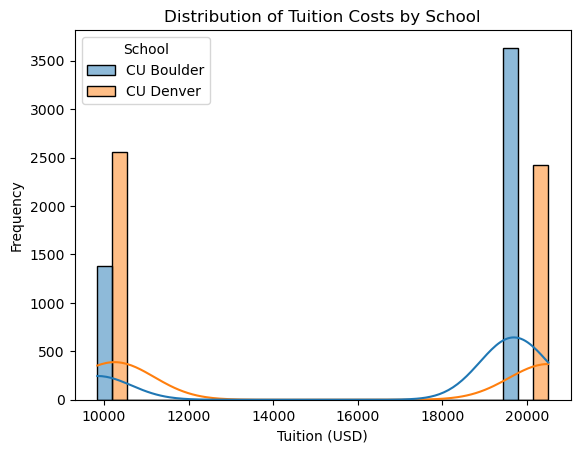

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Combine results into a DataFrame
data = []
for school, costs in results.items():
    for cost in costs:
        data.append({"School": school, "Tuition Cost": cost})

df = pd.DataFrame(data)  # ✅ Convert to DataFrame

# Plot using Seaborn
sns.histplot(data=df, x="Tuition Cost", hue="School", kde=True, bins=30)
plt.title("Distribution of Tuition Costs by School")
plt.xlabel("Tuition (USD)")
plt.ylabel("Frequency")
plt.show()


Conculsion:

Based on 10,000 simulations, CU Boulder students are more likely to graduate, which leads to higher average tuition costs due to full debt repayment. CU Denver, with a lower graduation rate, shows a greater proportion of students paying only partial tuition, resulting in a lower average cost. The final simulated expected tuition values was about 16,972.09 for CU Boulder and 15,243.33 for CU Denver.
